In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def exponential(x, rate):
    """ Exponential distribution formula """
    return rate * np.exp(-rate * x) if x >= 0 else 0

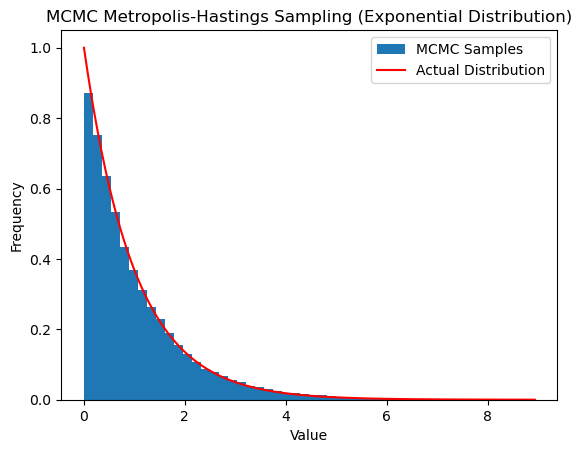

In [5]:
def metropolis_hastings_exp(rate, proposal_width, n_samples):
    samples = []
    current = np.random.exponential(1.0 / rate)  # Start from a random point from the exponential distribution

    for i in range(n_samples):
        proposal = np.random.normal(current, proposal_width)  # Propose a new point

        # Ensure that proposal is non-negative
        if proposal < 0:
            accept_prob = 0  # Reject negative proposals
        else:
            # Calculate acceptance probability
            accept_prob = min(1, exponential(proposal, rate) / 
                                 exponential(current, rate))

        # Accept or reject the proposal
        if np.random.rand() < accept_prob:
            current = proposal

        samples.append(current)

    return samples

# Parameters for the target distribution
rate = 1.0  # Rate parameter for the exponential distribution

# Number of samples to draw
n_samples = 100000

# Width of the proposal distribution
proposal_width = 0.5

# Run the Metropolis-Hastings algorithm
samples = metropolis_hastings_exp(rate, proposal_width, n_samples)

# Plot the results
plt.hist(samples, bins=50, density=True, label='MCMC Samples')

# Add the actual Exponential distribution for comparison
x_values = np.linspace(0, max(samples), 1000)
plt.plot(x_values, [exponential(x, rate) for x in x_values], 'r', label='Actual Distribution')

plt.title('MCMC Metropolis-Hastings Sampling (Exponential Distribution)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
